# Kinematic Report Tool

## 1) Setup


### Generate the Kinemtatic Model from a hardpoints file
Edit parameters/hardpoints.yaml, then run the code below

In [10]:
from kinematics.kinematic_model import KinematicModel
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import matplotlib.ticker as FuncFormatter
import numpy as np
import pandas as pd

test_kin_model = KinematicModel()
# test_kin_model.from_hardpoints('parameters/hardpoints.yaml')
steering_delta = [20, 51]
front_left_delta = [-20, 25, 51]
rear_left_delta = [-5, 5, 51]
test_kin_model.from_xlsx('parameters/HDPT_Export.xlsx', steering_delta, front_left_delta, rear_left_delta)
f = test_kin_model.front
r = test_kin_model.rear

## 2) Graphing

### Motion Ratio

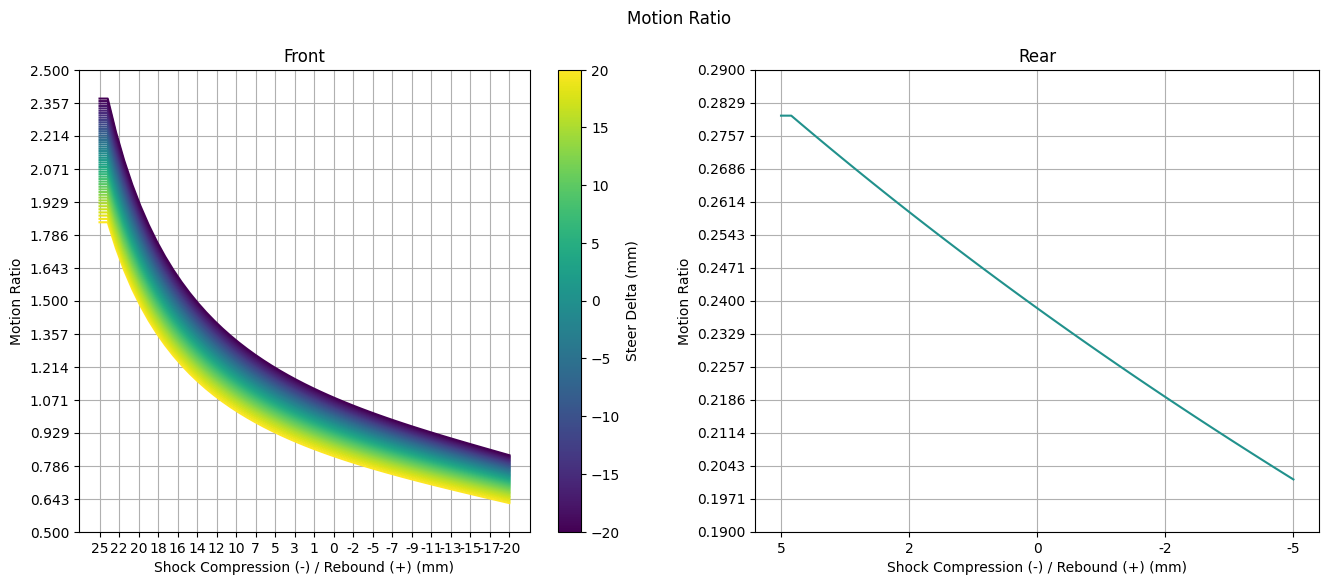

In [21]:
fig = plt.figure(figsize=(16,6))
fig.suptitle('Motion Ratio')
fig.tight_layout()
n = len(f[0,:,0])
colormap = plt.cm.viridis
colors = [colormap(i) for i in np.linspace(1, 0, n)]

norm = mpl.colors.Normalize(vmin=-steering_delta[0],vmax=steering_delta[0])
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.viridis,norm=norm)

ax1 = fig.add_subplot(121)

for i in range(n):
    ax1.plot(f[:,i,0],f[:,i,2])

for i, line in enumerate(ax1.lines):
    line.set_color(colors[i])

ax1.set_xlabel('Shock Compression (-) / Rebound (+) (mm)')
ax1.set_ylabel('Motion Ratio')
ax1.set_title('Front')
ax1.grid(True)
ax1.set_xticks(np.linspace(front_left_delta[0], front_left_delta[1], int(front_left_delta[1] - front_left_delta[0])//2))
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax1.set_yticks(np.linspace(ax1.get_yticks()[0], ax1.get_yticks()[-1],15))
ax1.invert_xaxis()


ax2 = fig.add_subplot(122)
ax2.plot(r[:,0,0],r[:,0,2],color=colors[n//2])
ax2.set_xlabel('Shock Compression (-) / Rebound (+) (mm)')
ax2.set_ylabel('Motion Ratio')
ax2.set_title('Rear')
ax2.grid(True)
ax2.set_xticks(np.linspace(rear_left_delta[0], rear_left_delta[1], int(rear_left_delta[1] - rear_left_delta[0])//2))
ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1],15))
ax2.invert_xaxis()
cbar = plt.colorbar(scalar_mappable,ax=ax1,label='Steer Delta (mm)');


### Camber Gain and Bump Steer (Neutral Steer)


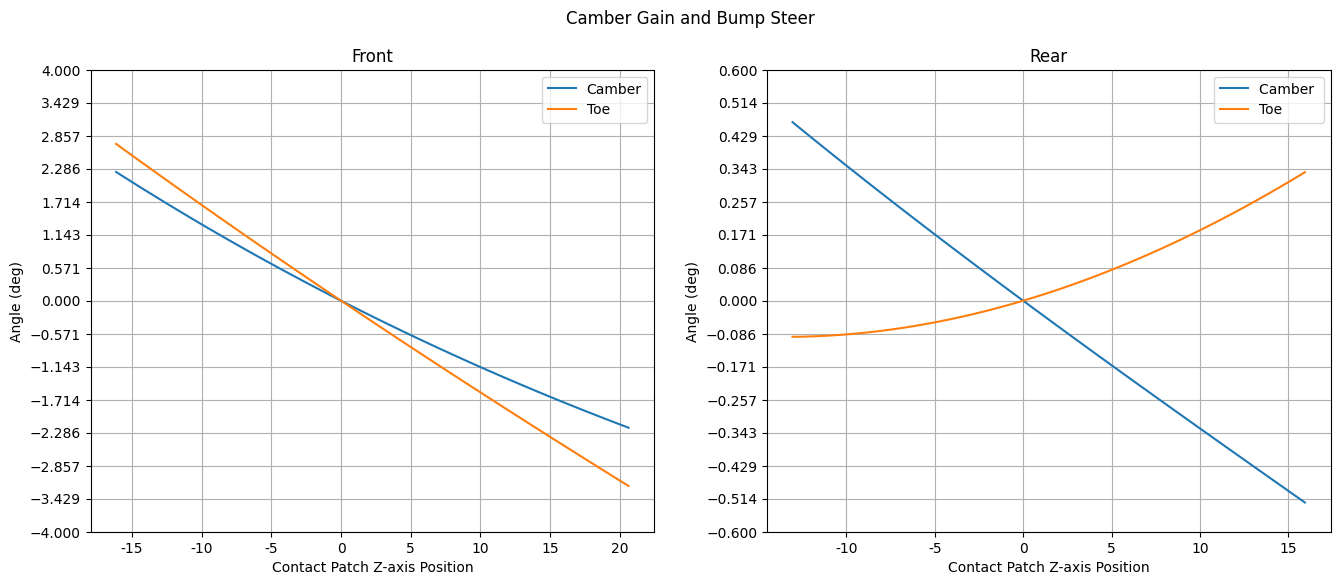

In [19]:
fig = plt.figure(figsize=(16,6))
fig.suptitle('Camber Gain and Bump Steer')
fig.tight_layout()
n = len(f[0,:,0])
ax1 = fig.add_subplot(121)
ax1.plot(f[:,n//2,5],-np.rad2deg(f[:,n//2,9]), label = "Camber")
ax1.plot(f[:,n//2,5],np.rad2deg(f[:,n//2,10]), label = "Toe")
ax1.legend()
ax1.set_xlabel('Contact Patch Z-axis Position')
ax1.set_ylabel('Angle (deg)')
ax1.set_title('Front')
ax1.grid(True)
# ax1.set_xticks(np.linspace(front_left_delta[0], front_left_delta[1], int(front_left_delta[1] - front_left_delta[0])//2))
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax1.set_yticks(np.linspace(ax1.get_yticks()[0], ax1.get_yticks()[-1],15))

ax2 = fig.add_subplot(122)
ax2.plot(r[:,0,5],-np.rad2deg(r[:,0,9]), label = "Camber ")
ax2.plot(r[:,0,5],np.rad2deg(r[:,0,10]), label = "Toe")
ax2.set_xlabel('Contact Patch Z-axis Position')
ax2.set_ylabel('Angle (deg)')
ax2.legend()
ax2.grid(True)
# ax2.set_xticks(np.linspace(rear_left_delta[0], rear_left_delta[1], int(rear_left_delta[1] - rear_left_delta[0])//2))
ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1],15))
ax2.set_title('Rear');

front_dict = {"Shock Displacement (mm)":f[:,n//2,0],"Contact Patch Z-axis Position (mm)":f[:,n//2,5],"Camber (deg)":np.rad2deg(f[:,n//2,9]),"Toe (deg)":np.rad2deg(f[:,n//2,10])}
front_table = pd.DataFrame(front_dict)
front_table.to_csv("tables/front_camber+toe.csv",index=False)

rear_dict = {"Shock Displacement (mm)":r[:,0,0],"Contact Patch Z-axis Position (mm)":r[:,0,5],"Camber (deg)":np.rad2deg(r[:,0,9]),"Toe (deg)":np.rad2deg(r[:,0,10])}
rear_table = pd.DataFrame(rear_dict)
rear_table.to_csv("tables/rear_camber+toe.csv",index=False)

### Front Camber Gain (Non-Neutral Steer)

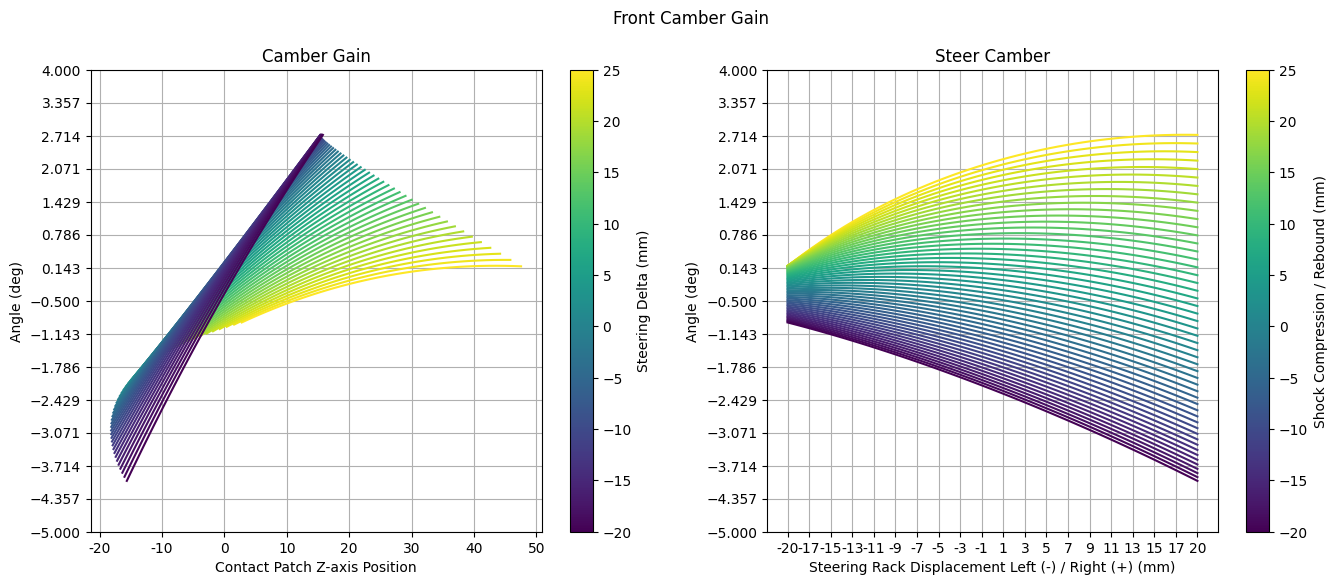

In [13]:
fig = plt.figure(figsize=(16,6))
fig.suptitle('Front Camber Gain')
fig.tight_layout()

n = len(f[0,:,0])
colormap = plt.cm.viridis
colors = [colormap(i) for i in np.linspace(1, 0, n)]
norm = mpl.colors.Normalize(vmin=-steering_delta[0],vmax=steering_delta[0])
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.viridis,norm=norm)

ax1 = fig.add_subplot(121)

for i in range(n):
    ax1.plot(f[:,i,5], np.rad2deg(f[:,i,9]))

for i, line in enumerate(ax1.lines):
    line.set_color(colors[i])

ax1.set_xlabel('Contact Patch Z-axis Position')
ax1.set_ylabel('Angle (deg)')
ax1.set_title('Camber Gain')
ax1.grid(True)
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax1.set_yticks(np.linspace(ax1.get_yticks()[0], ax1.get_yticks()[-1],15))

n = len(f[:,0,0])
colormap = plt.cm.viridis
colors = [colormap(i) for i in np.linspace(1, 0, n)]
norm = mpl.colors.Normalize(vmin=front_left_delta[0],vmax=front_left_delta[1])
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.viridis,norm=norm)

ax2 = fig.add_subplot(122)
for i in range(n):
    ax2.plot(f[i,:,1], np.rad2deg(f[i,:,9]))

for i, line in enumerate(ax2.lines):
    line.set_color(colors[i])

ax2.set_xlabel('Steering Rack Displacement Left (-) / Right (+) (mm)')
ax2.set_ylabel('Angle (deg)')
ax2.set_title('Steer Camber')
ax2.grid(True)
ax2.set_xticks(np.linspace(-steering_delta[0], steering_delta[0], int(steering_delta[0])))
ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1],15))

cbar = plt.colorbar(scalar_mappable,ax=ax1,label='Steering Delta (mm)')
cbar = plt.colorbar(scalar_mappable,ax=ax2,label='Shock Compression / Rebound (mm)');

### Steering and Ackermann

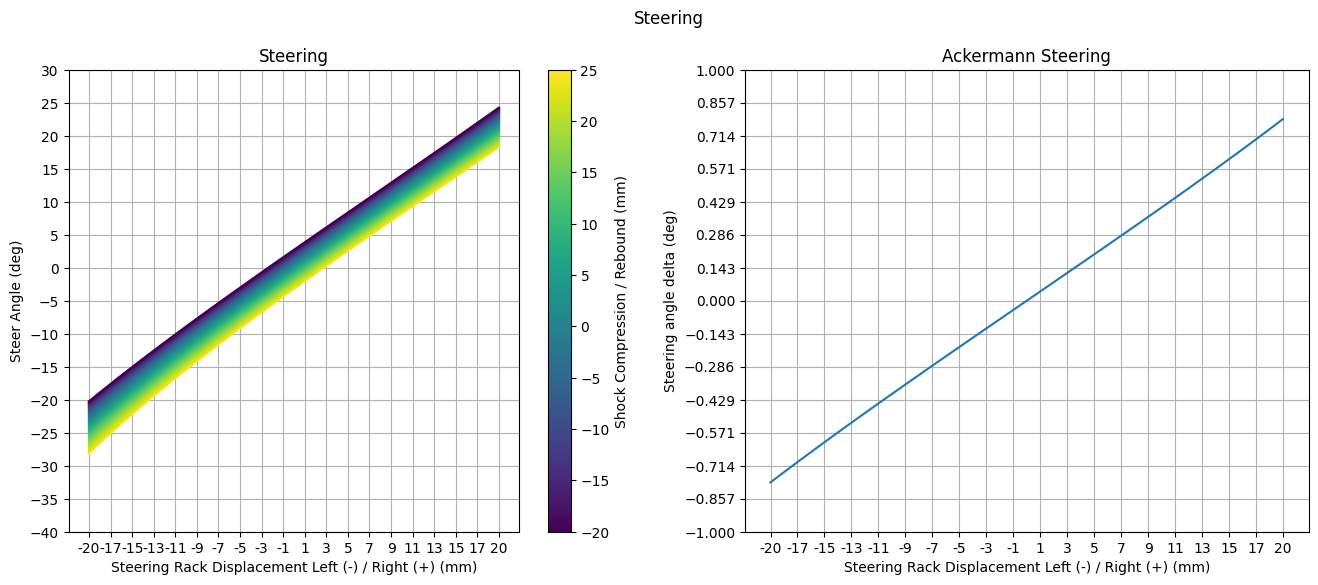

In [14]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig = plt.figure(figsize=(16,6))
fig.suptitle('Steering')
fig.tight_layout()
n = len(f[:,0,0])
colormap = plt.cm.viridis
colors = [colormap(i) for i in np.linspace(1, 0, n)]

norm = mpl.colors.Normalize(vmin=front_left_delta[0],vmax=front_left_delta[1])
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.viridis,norm=norm)

ax1 = fig.add_subplot(121)

for i in range(n):
    ax1.plot(f[i,:,1], np.rad2deg(f[i,:,10]))

for i, line in enumerate(ax1.lines):
    # line.set_color(colors[abs(i-n//2)*2])
    line.set_color(colors[i])

ax1.set_xlabel('Steering Rack Displacement Left (-) / Right (+) (mm)')
ax1.set_ylabel('Steer Angle (deg)')
ax1.set_title('Steering')
ax1.grid(True)
ax1.set_xticks(np.linspace(-steering_delta[0], steering_delta[0], int(steering_delta[0])))
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax1.set_yticks(np.linspace(ax1.get_yticks()[0], ax1.get_yticks()[-1],15))

colormap = plt.cm.viridis
colors = [colormap(i) for i in np.linspace(1, 0, n)]

norm = mpl.colors.Normalize(vmin=front_left_delta[0],vmax=front_left_delta[1])
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.viridis,norm=norm)
fig.colorbar(scalar_mappable,ax=ax1,label='Shock Compression / Rebound (mm)')

ackermann = (f[n//2,:,10] - f[n//2,::-1,10])
ax2 = fig.add_subplot(122)
ax2.plot(f[n//2,:,1], ackermann)

ax2.set_xlabel('Steering Rack Displacement Left (-) / Right (+) (mm)')
ax2.set_ylabel('Steering angle delta (deg)')
ax2.grid(True)
ax2.set_xticks(np.linspace(-steering_delta[0], steering_delta[0], int(steering_delta[0])))
ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1],15))
ax2.set_title('Ackermann Steering');

### Contact Patch Configuration Spaces

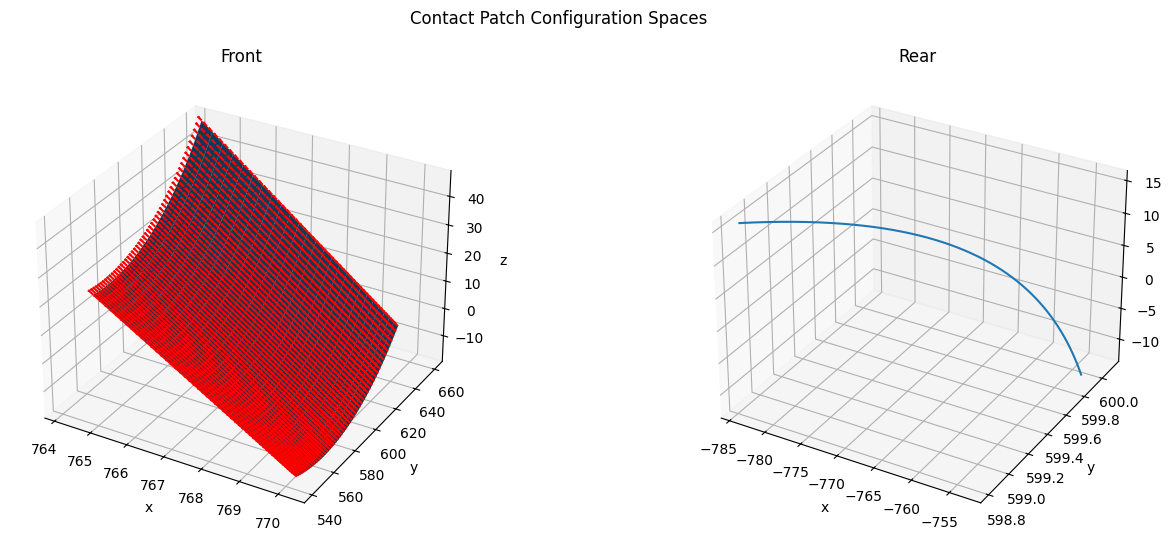

In [15]:
fig = plt.figure(figsize=(16,6))
fig.suptitle('Contact Patch Configuration Spaces')
fig.tight_layout()
ax1 = fig.add_subplot(121,projection="3d")
ax1.plot_surface(f[:,:,3],f[:,:,4],f[:,:,5])
ax1.quiver(f[:,:,3],f[:,:,4],f[:,:,5], f[:,:,6],f[:,:,7],f[:,:,8], length=1, color='r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Front')

ax2 = fig.add_subplot(122,projection="3d")
ax2.plot(r[:,0,3],r[:,0,4],r[:,0,5])
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Rear');

### ARB Angle (degrees)

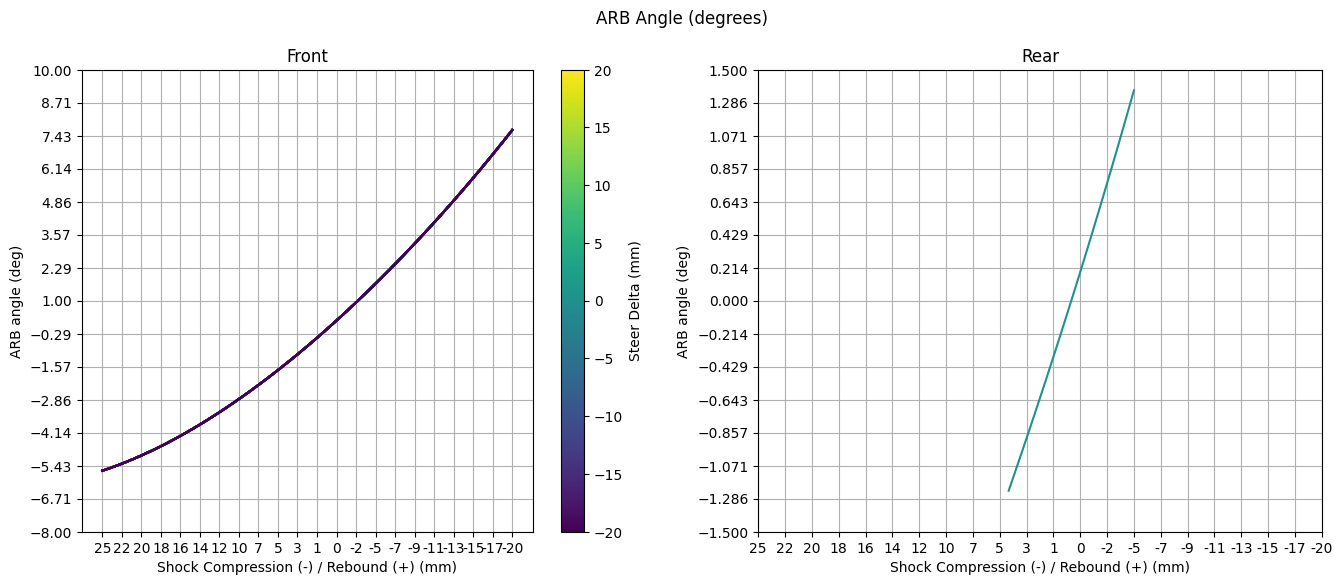

In [24]:
fig = plt.figure(figsize=(16,6))
fig.suptitle('ARB Angle (degrees)')
fig.tight_layout()
n = len(f[0,:,0])
colormap = plt.cm.viridis
colors = [colormap(i) for i in np.linspace(1, 0, n)]

norm = mpl.colors.Normalize(vmin=-steering_delta[0],vmax=steering_delta[0])
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.viridis,norm=norm)

ax1 = fig.add_subplot(121)

for i in range(n):
    ax1.plot(f[:,i,0],f[:,i,14])

for i, line in enumerate(ax1.lines):
    line.set_color(colors[i])

ax1.set_xlabel('Shock Compression (-) / Rebound (+) (mm)')
ax1.set_ylabel('ARB angle (deg)')
ax1.set_title('Front')
ax1.grid(True)
ax1.set_xticks(np.linspace(front_left_delta[0], front_left_delta[1], int(front_left_delta[1] - front_left_delta[0])//2))
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax1.set_yticks(np.linspace(ax1.get_yticks()[0], ax1.get_yticks()[-1],15))
ax1.invert_xaxis()


ax2 = fig.add_subplot(122)
ax2.plot(r[:,0,0],r[:,0,14],color=colors[n//2])
ax2.set_xlabel('Shock Compression (-) / Rebound (+) (mm)')
ax2.set_ylabel('ARB angle (deg)')
ax2.set_title('Rear')
ax2.grid(True)
ax2.set_xticks(np.linspace(front_left_delta[0], front_left_delta[1], int(front_left_delta[1] - front_left_delta[0])//2))
ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1],15))
ax2.invert_xaxis()
cbar = plt.colorbar(scalar_mappable,ax=ax1,label='Steer Delta (mm)');


### ARB Arm to Wheel Displacement (z-axis) Motion Ratio

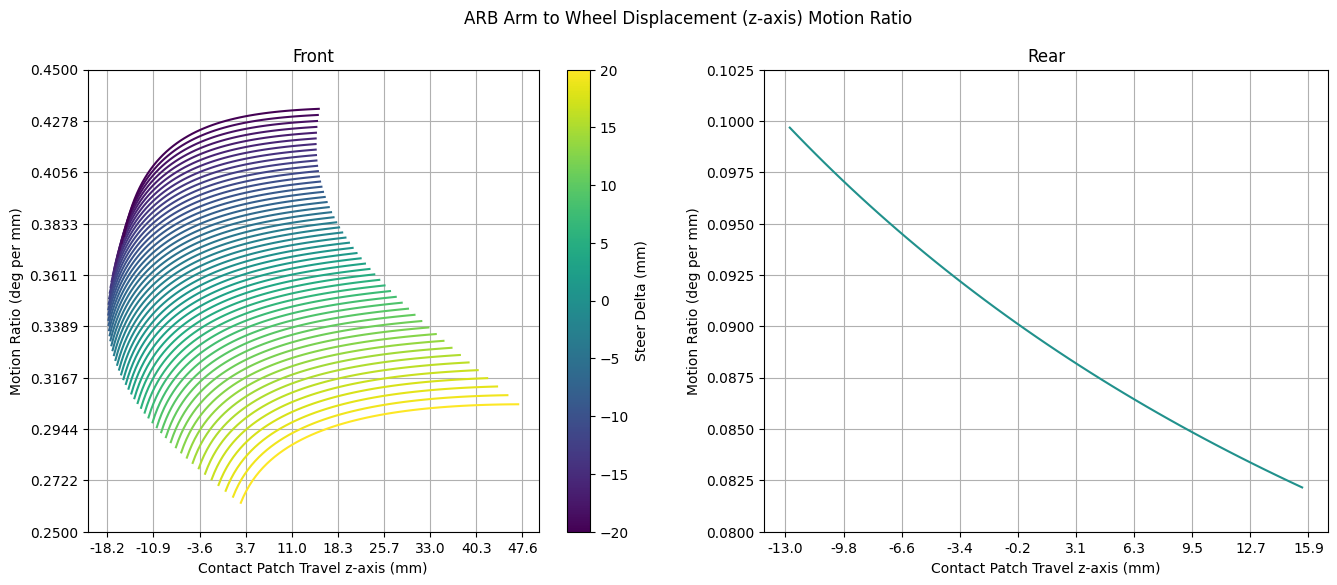

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
import numpy as np

fig = plt.figure(figsize=(16,6))
fig.suptitle('ARB Arm to Wheel Displacement (z-axis) Motion Ratio')
fig.tight_layout()
n = len(f[0,:,0])
colormap = plt.cm.viridis
colors = [colormap(i) for i in np.linspace(1, 0, n)]

norm = mpl.colors.Normalize(vmin=-steering_delta[0], vmax=steering_delta[0])
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)

ax1 = fig.add_subplot(121)
for i in range(n):
    z = f[:, i, 15]
    arb = f[:, i, 14]
    dz = np.diff(z)
    darb = np.diff(arb)
    motion_ratio = darb / dz
    z_mid = (z[:-1] + z[1:]) / 2
    ax1.plot(z_mid, motion_ratio)

for i, line in enumerate(ax1.lines):
    line.set_color(colors[i])

ax1.set_xlabel('Contact Patch Travel z-axis (mm)')
ax1.set_ylabel('Motion Ratio (deg per mm)')
ax1.set_title('Front')
ax1.grid(True)
z_min, z_max = np.min(f[:, :, 15]), np.max(f[:, :, 15])
ax1.set_xticks(np.linspace(z_min, z_max, 10))
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f')) 
ax1.set_yticks(np.linspace(ax1.get_yticks()[0], ax1.get_yticks()[-1], 10))

ax2 = fig.add_subplot(122)
z = r[:, 0, 15]
arb = r[:, 0, 14]
dz = np.diff(z)
darb = np.diff(arb)
motion_ratio = darb / dz
z_mid = (z[:-1] + z[1:]) / 2
ax2.plot(z_mid, motion_ratio, color=colors[n//2])

ax2.set_xlabel('Contact Patch Travel z-axis (mm)')
ax2.set_ylabel('Motion Ratio (deg per mm)')
ax2.set_title('Rear')
ax2.grid(True)
z_min_r, z_max_r = np.min(r[:, :, 15]), np.max(r[:, :, 15])
ax2.set_xticks(np.linspace(z_min_r, z_max_r, 10))
ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], 10))

cbar = plt.colorbar(scalar_mappable, ax=ax1, label='Steer Delta (mm)')

plt.show()

### Roll Center Migration

High matrix condition number: 2.1617266554862686e+19
This suggests the instant center projections are nearly parallel
High matrix condition number: inf
This suggests the instant center projections are nearly parallel
High matrix condition number: 2.1617266554862686e+19
This suggests the instant center projections are nearly parallel
High matrix condition number: inf
This suggests the instant center projections are nearly parallel
The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
[0. 0. 0. 0.]
High matrix condition number: 163648242273639.03
This suggests the instant center projections are nearly parallel
High matrix condition number: 163648242273639.03
This suggests the instant center projections are nearly parallel
The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
[0. 0. 0. 0.]
High matrix condition number: 163648242273639.03
This suggests the instant center projections ar

c:\Dropbox\LHRCode\LapSim\kinematics\multibody_kinematics.py:61: RuntimeWarning: invalid value encountered in divide
  roll_axis = roll_axis/np.linalg.norm(roll_axis)


The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
[0. 0. 0. 0.]
High matrix condition number: 163648242273639.03
This suggests the instant center projections are nearly parallel
High matrix condition number: 163648242273639.03
This suggests the instant center projections are nearly parallel
The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
[0. 0. 0. 0.]
High matrix condition number: 163648242273639.03
This suggests the instant center projections are nearly parallel
High matrix condition number: 163648242273639.03
This suggests the instant center projections are nearly parallel
The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
[0. 0. 0. 0.]
High matrix condition number: 163648242273639.03
This suggests the instant center projections are nearly parallel
High matrix condition number: 163648242273639.03
This suggests the 

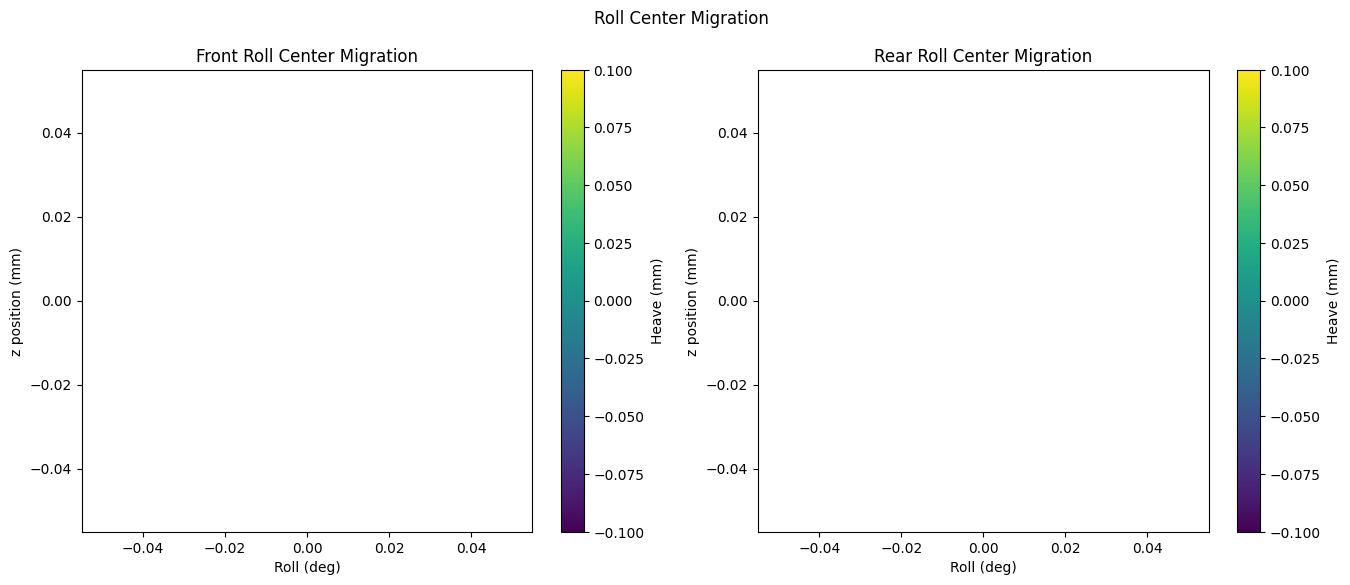

In [18]:
import kinematics.multibody_kinematics as mb_kin
roll_range = 1 # deg
# heave_range = [-1,1] # mm
heave_range = [0,0]
roll_steps = 100
heave_steps = 1
roll_space = np.linspace(0, roll_range, roll_steps)
heave_space = np.linspace(heave_range[0], heave_range[1], heave_steps)

rc_z = mb_kin.integrate_roll_axis(test_kin_model, 0.0, roll_range, roll_steps, heave_range, heave_steps)
fig = plt.figure(figsize=(16,6))
fig.suptitle('Roll Center Migration')
fig.tight_layout()

n = len(rc_z[:,0,0])
colormap = plt.cm.viridis
colors = [colormap(i) for i in np.linspace(1, 0, n)]
norm = mpl.colors.Normalize(vmin=heave_range[0],vmax=heave_range[1])
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.viridis,norm=norm)

ax1 = fig.add_subplot(121)

for i in range(n):
    ax1.plot(roll_space, rc_z[i,:,0])

for i, line in enumerate(ax1.lines):
    line.set_color(colors[i])

ax1.set_xlabel('Roll (deg)')
ax1.set_ylabel('z position (mm)')
ax1.set_title('Front Roll Center Migration')

ax2 = fig.add_subplot(122)

for i in range(n):
    ax2.plot(roll_space, rc_z[i,:,1])

for i, line in enumerate(ax2.lines):
    line.set_color(colors[i])

ax2.set_xlabel('Roll (deg)')
ax2.set_ylabel('z position (mm)')
ax2.set_title('Rear Roll Center Migration')

cbar = plt.colorbar(scalar_mappable,ax=ax1,label='Heave (mm)')
cbar = plt.colorbar(scalar_mappable,ax=ax2,label='Heave (mm)');